In [1]:
import os
os.chdir(r'D:\D\Simpliv - ML')

In [2]:
import pandas as pd

In [3]:
stats = pd.read_csv('DemographicData.csv')

In [5]:
type(stats)

pandas.core.frame.DataFrame

In [7]:
len(stats)

195

In [9]:
len(stats.columns)

5

In [11]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [12]:
stats.describe()

,Birth rate,Internet users
count,195.000000,195.000000
mean,21.469928,42.076471
std,10.605467,29.030788
min,7.900000,0.900000
25%,12.120500,14.520000
50%,19.680000,41.000000
75%,29.759500,66.225000
max,49.661000,96.546800


In [18]:
stats.columns = ['CountryName', 'CountryCode', 'BirthRate','InternetUsers', 'IncomeGroup']

In [24]:
stats = stats.rename(columns={'CountryName':'CN'})

In [27]:
stats.rename(columns={'CN':'CountryName'}, inplace=True)

In [28]:
stats

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [30]:
stats[1:4][['CountryName','BirthRate']]

,CountryName,BirthRate
1,Afghanistan,35.253
2,Angola,45.985
3,Albania,12.877


In [35]:
stats.iloc[1:4,2:5].values

array([[35.253, 5.9, 'Low income'],
       [45.985, 19.1, 'Upper middle income'],
       [12.877, 57.2, 'Upper middle income']], dtype=object)

In [37]:
stats.iloc[:,[1,3]]

,CountryCode,InternetUsers
0,ABW,78.9
1,AFG,5.9
2,AGO,19.1
3,ALB,57.2
4,ARE,88.0
...,...,...
190,YEM,20.0
191,ZAF,46.5
192,COD,2.2
193,ZMB,15.4


In [42]:
stats[(stats['CountryName']=='India') |(stats['CountryName']=='Pakistan') | (stats['CountryName']=='Sri Lanka')]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
80,India,IND,20.291,15.1,Lower middle income
103,Sri Lanka,LKA,17.863,21.9,Lower middle income
135,Pakistan,PAK,29.582,10.9,Lower middle income


In [47]:
stats[stats['CountryName'].isin(['India','Pakistan','Sri Lanka', 'Albania'])]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
3,Albania,ALB,12.877,57.2,Upper middle income
80,India,IND,20.291,15.1,Lower middle income
103,Sri Lanka,LKA,17.863,21.9,Lower middle income
135,Pakistan,PAK,29.582,10.9,Lower middle income


In [49]:
stats['MyCal']=stats.BirthRate * stats.InternetUsers

In [54]:
stats.sort_values(['MyCal'], ascending=0)

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup,MyCal
96,Kuwait,KWT,20.575,75.46,High income,1552.5895
128,Nigeria,NGA,40.045,38.00,Lower middle income,1521.7100
85,Israel,ISR,21.300,70.80,High income,1508.0400
188,West Bank and Gaza,PSE,30.394,46.60,Lower middle income,1416.3604
91,Kenya,KEN,35.194,39.00,Lower middle income,1372.5660
...,...,...,...,...,...,...
64,Guinea,GIN,37.337,1.60,Low income,59.7392
11,Burundi,BDI,44.151,1.30,Low income,57.3963
172,Timor-Leste,TLS,35.755,1.10,Lower middle income,39.3305
52,Eritrea,ERI,34.800,0.90,Low income,31.3200


In [55]:
stats[stats['InternetUsers']<2]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup,MyCal
11,Burundi,BDI,44.151,1.3,Low income,57.3963
52,Eritrea,ERI,34.800,0.9,Low income,31.3200
55,Ethiopia,ETH,32.925,1.9,Low income,62.5575
64,Guinea,GIN,37.337,1.6,Low income,59.7392
117,Myanmar,MMR,18.119,1.6,Lower middle income,28.9904
127,Niger,NER,49.661,1.7,Low income,84.4237
154,Sierra Leone,SLE,36.729,1.7,Low income,62.4393
156,Somalia,SOM,43.891,1.5,Low income,65.8365
172,Timor-Leste,TLS,35.755,1.1,Lower middle income,39.3305


In [60]:
type(stats['InternetUsers']<2)

pandas.core.series.Series

In [58]:
stats.IncomeGroup.unique()

array(['High income', 'Low income', 'Upper middle income',
       'Lower middle income'], dtype=object)

In [61]:
import matplotlib.pyplot as plt
#Arrays , Tuples, Lists, Pandas Series 
import seaborn as sns
#DataFrame 

In [65]:
stats.BirthRate

0      10.244
1      35.253
2      45.985
3      12.877
4      11.044
        ...  
190    32.947
191    20.850
192    42.394
193    40.471
194    35.715
Name: BirthRate, Length: 195, dtype: float64

In [68]:
stats[['BirthRate']]

,BirthRate
0,10.244
1,35.253
2,45.985
3,12.877
4,11.044
...,...
190,32.947
191,20.850
192,42.394
193,40.471


In [72]:
stats.iloc[1:3,4:5].values

array([['Low income'],
       ['Upper middle income']], dtype=object)

In [73]:
stats

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup,MyCal
0,Aruba,ABW,10.244,78.9,High income,808.2516
1,Afghanistan,AFG,35.253,5.9,Low income,207.9927
2,Angola,AGO,45.985,19.1,Upper middle income,878.3135
3,Albania,ALB,12.877,57.2,Upper middle income,736.5644
4,United Arab Emirates,ARE,11.044,88.0,High income,971.8720
...,...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income,658.9400
191,South Africa,ZAF,20.850,46.5,Upper middle income,969.5250
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income,93.2668
193,Zambia,ZMB,40.471,15.4,Lower middle income,623.2534


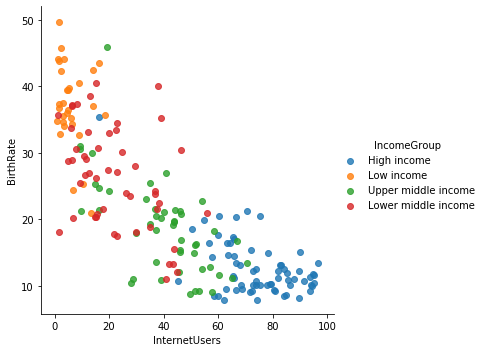

In [76]:
sns.lmplot(data=stats, x='InternetUsers', y='BirthRate', fit_reg=False, hue='IncomeGroup')

In [79]:
year = [2016, 2017, 2018, 2019, 2020]
sales = [3432,3223,5654,3322,2266]
profit = [435,445,333,234,554]

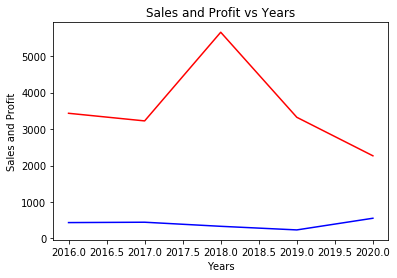

In [86]:
plt.plot(year,sales, 'red')
plt.plot(year, profit, 'blue')
plt.title('Sales and Profit vs Years')
plt.xlabel('Years')
plt.ylabel('Sales and Profit')
plt.show()

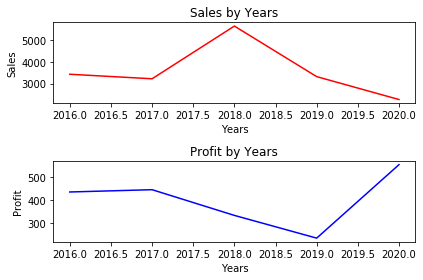

In [91]:
plt.subplot(2,1,1)
plt.plot(year,sales, 'red')
plt.title('Sales by Years')
plt.xlabel('Years')
plt.ylabel('Sales')

plt.subplot(2,1,2)
plt.plot(year,profit, 'blue')
plt.title('Profit by Years')
plt.xlabel('Years')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

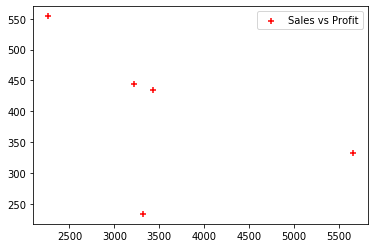

In [95]:
plt.scatter(y=profit, x=sales, marker='+', label = 'Sales vs Profit', color='red')
plt.legend()

In [97]:
dataset = pd.read_excel('Sample - Superstore.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [98]:
dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


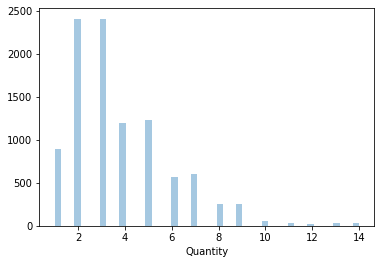

In [100]:
sns.distplot(dataset['Quantity'],kde=False)

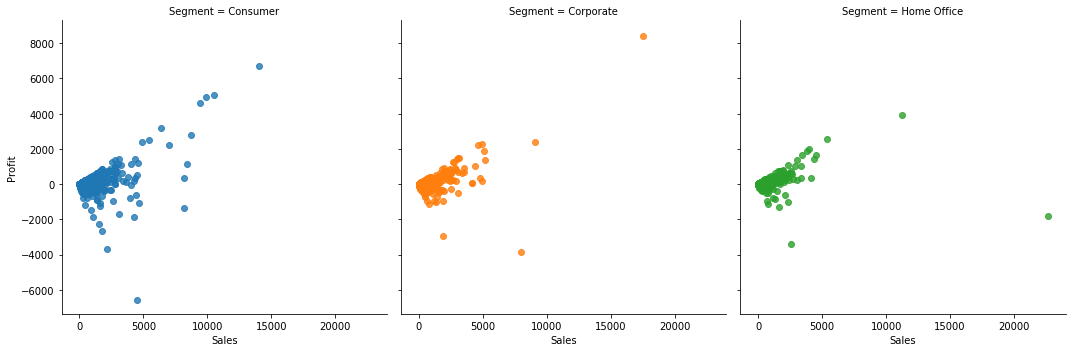

In [107]:
sns.lmplot(y='Profit', x='Sales', data=dataset, fit_reg=False, hue='Segment', col='Segment')

In [106]:
sns.regplot(y='Profit', x='Sales', data=dataset, fit_reg=False,col='Segment')

TypeError: regplot() got an unexpected keyword argument 'col'

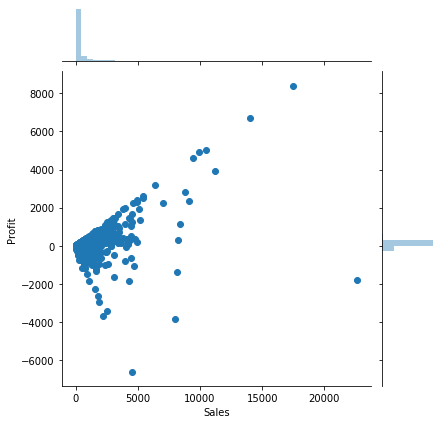

In [108]:
sns.jointplot(x='Sales',y='Profit', data=dataset)

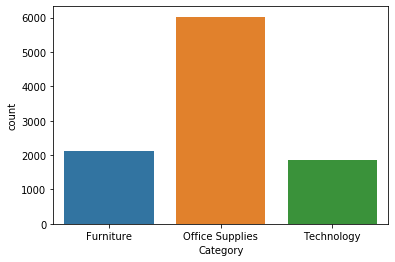

In [111]:
sns.countplot(data=dataset, x='Category')

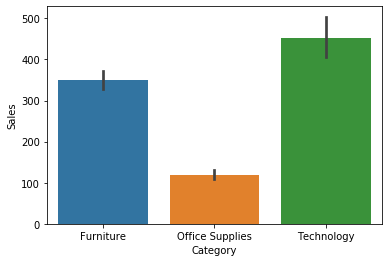

In [112]:
sns.barplot(y='Sales',x='Category',data=dataset)

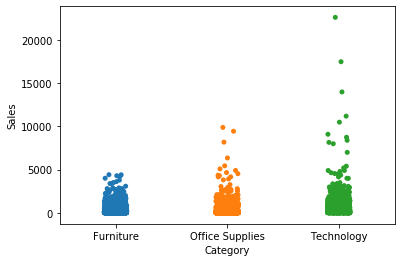

In [113]:
sns.stripplot(x='Category', y='Sales', data=dataset)

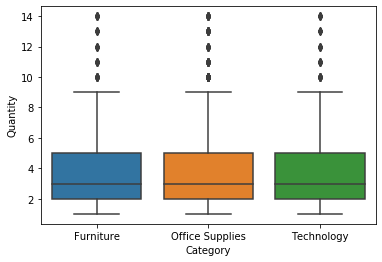

In [115]:
sns.boxplot(data=dataset, y='Quantity', x='Category')

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


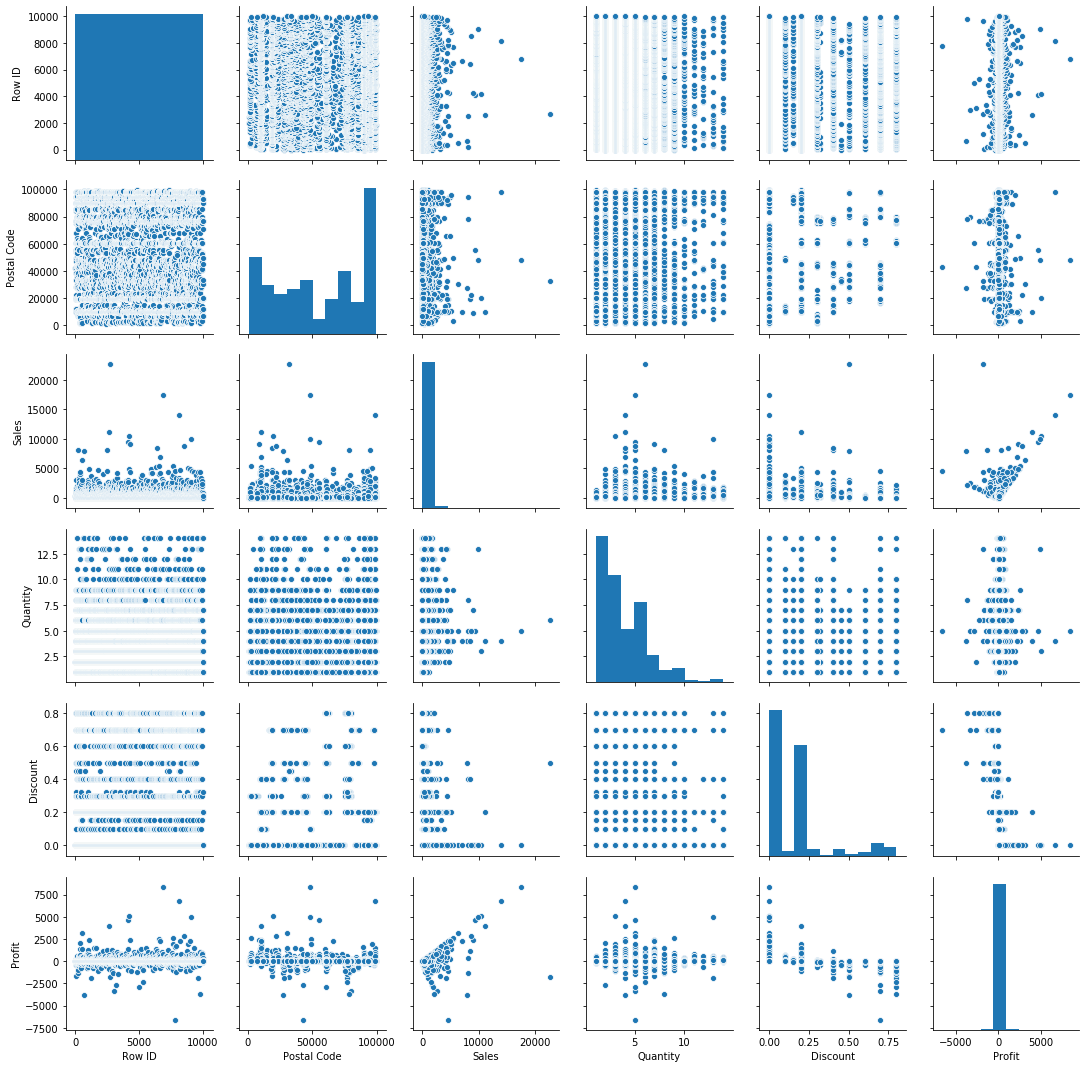

In [116]:
sns.pairplot(dataset)

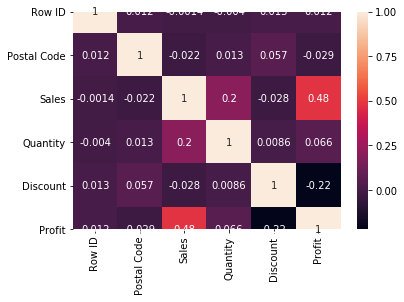

In [120]:
sns.heatmap(dataset.corr(), annot=True)

In [122]:
dataset_ts = pd.read_csv('airline_passengers.csv')

In [126]:
dataset_ts

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


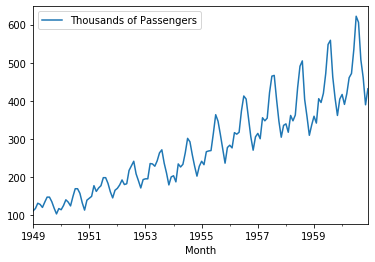

In [135]:
dataset_ts.plot(0)

In [130]:
dataset_ts['Month'] =pd.to_datetime(dataset_ts['Month'])

In [131]:
dataset_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [134]:
dataset_ts

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [136]:
dataset_ts.set_index('Month', inplace=True)

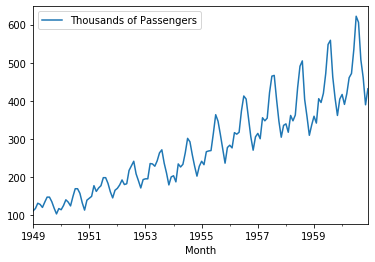

In [140]:
dataset_ts.plot()